# **Assignment 1**
**Introduction:**
Bangla (Bengali) is the second most spoken language in India. It ranks fifth
in Asia and it is also in the top ten spoken languages in the world. So, a
huge number of people depend on this language for their day to day communication. Therefore, automatic recognition of Bengali handwritten characters and numeral digits are needed to be digitized for making the communication smoother. Many research works and models have been proposed to recognize Bengali handwritten characters and numeral digits so far, but still, a huge scopeis there to improve this task in terms of accuracy and applicability. 

Images of handwritten digits are different from natural images as the orientation of a digit, as well as similarity of features of different digits, makes confusion. Here, we propose a task-oriented model called Bengali handwritten numeral digit recognition based
on MNIST Digit Recognizer (Logistic Regression)

In this notebook we will be exploring  different bengali numerals dataset and use to classify these digits. We will be using the following two datasets in these notebook.
*   Bengali.AI NumtaDB
*   Ekush 

Here are the corresponding bn-eng numerals representation.

*   ০ , ১ , ২ , ৩ , ৪ , ৫ , ৬ , ৭ , ৮ , ৯
*   0 ,  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9




**Logistic Regression :** Logistic Regression is a Machine Learning Algorithm which is used for the classification problems,it is a predictive analysis algorithm and based on the concept of probability.

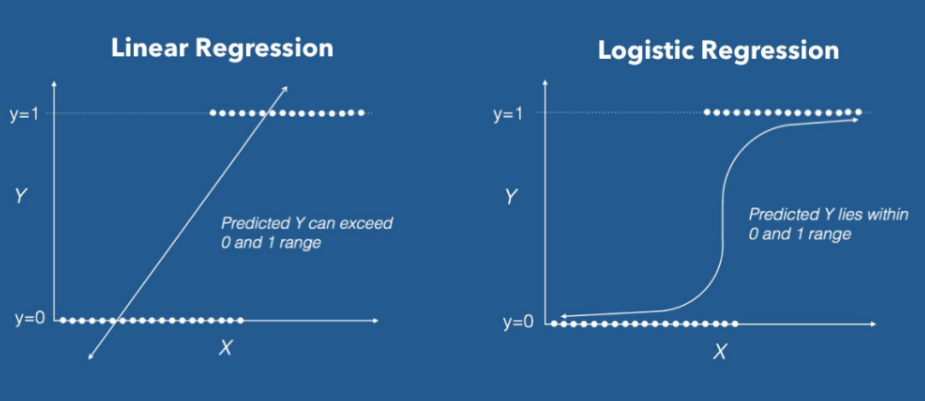

Logistic regression can be called as a linear regression model but logistic regression uses more complex cost function, the cost function can be defined as 'Sigmoid function' or also known as 'logistic function' instead of linear function. The hypothesis of logistic regression tends to limit the cost function between 0 and 1. Thus linear function fail t o represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of Logistic regression.

**Sigmoid Function :** In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

**Ekush Bengali Handwritten digits:**

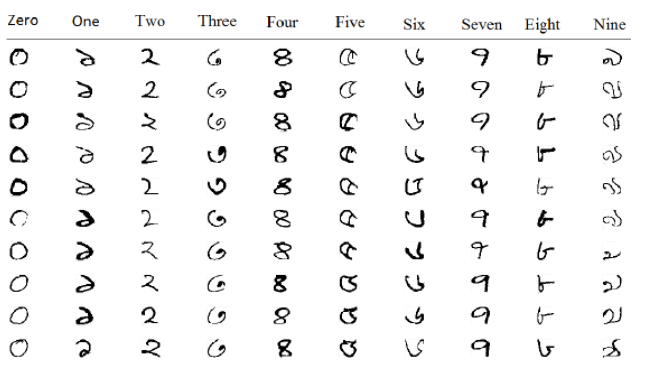

**NumtaDB: Bengali Handwritten Digits**

In [ ]:
import torch
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import os
import pandas as pd
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#all paths
csv_path = '/content/drive/MyDrive/CSE_4_2_Folder/namta/'

In [ ]:
def img_to_tensor(img_path, label):
  img = Image.open(img_path).convert('L')
  img = np.array(list(img.getdata()))
  img = img.reshape(-1, 180, 180)
  img = img / 255.0
  img = torch.FloatTensor(img)
  return (img, label)

In [ ]:
def read_csv(file_name):
  df = pd.read_csv(csv_path + file_name)
  in_filenames = df.get("filename")
  in_labels = df.get("digit")
  return (in_filenames, in_labels)

In [ ]:
train_dataset = []

In [ ]:
st = time.time();
def add_to_dataset(file_name, img_source):
  read_value = read_csv(file_name)
  f_names = read_value[0]
  labels = read_value[1]
  for i in range(len(f_names)):
    img_path = img_source + f_names[i]
    img_label = labels[i]
    if (i % 1000 == 0):
      en = time.time();
      _m = (en - st) / 60
      _h = (en - st) / 3600
      print(i, img_path, _m, _h)
    if (os.path.isfile(img_path)):
      x = img_to_tensor(img_path, img_label)
      train_dataset.append(x)

  print('done ... ', img_source, len(train_dataset))

In [ ]:
#Load Models
train_dataset = []

img_path = '/content/drive/MyDrive/CSE_4_2_Folder/namta/'
add_to_dataset('training-a.csv', img_path + 'training-a/')
add_to_dataset('training-c.csv', img_path + 'training-c/')
add_to_dataset('training-d.csv', img_path + 'training-d/')
en = time.time()
print("time taken =", (en - st) / 3600)

0 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a00000.png 0.0021352211634318033 3.558701939053006e-05
1000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a01000.png 0.13621847629547118 0.002270307938257853
2000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a02000.png 0.25803494850794473 0.004300582475132412
3000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a03000.png 0.38697360356648763 0.0064495600594414604
4000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a04000.png 0.5181047002474467 0.008635078337457445
5000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a05000.png 0.6409513513247173 0.01068252252207862
6000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a06000.png 0.7769155303637186 0.012948592172728644
7000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a07000.png 0.978733241558075 0.016312220692634584
8000 /content/drive/MyDrive/CSE_4_2_Folder/namta/training-a/a08000.png 1.1003752787907919 0.01833958797984653

**Input dimension:**

Size of image:  180×180=32400

**Output dimension:** 10

0, 1, 2, 3, 4, 5, 6, 7, 8, 9

# **Changing The Hyperparameters for First Try :**

In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 3000
input_dim = 180 * 180
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Splitting The Dataset:

In [ ]:
train = train_dataset

train_cnt = int(90.0 * len(train) / 100.0)


# Loading Bangla Digit Dataset

- **totaldata:** 51,202
- **minibatch:** 100
  - Number of examples in **1** iteration

- **iterations:** 3,000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{51202}{100} = 5.859$

In [ ]:
train_dataset = train[ : train_cnt]
test_dataset = train[train_cnt : ]
print(len(train_dataset), len(test_dataset))

46081 5121


In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

# Total dataset Length

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

46081
5121


In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([1, 180, 180])
(1, 180, 180)
5


# Displaying Bangla Digit Image

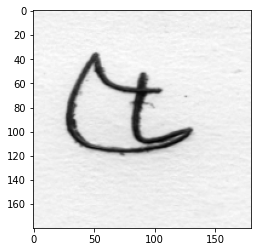

In [ ]:
## Displaying a MNIST Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_dataset[0][0].numpy().reshape(180, 180)

plt.imshow(show_img, cmap='gray')

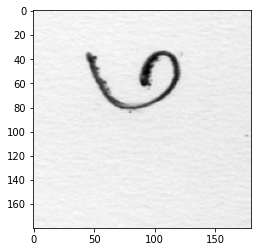

In [ ]:

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_dataset[1][0].numpy().reshape(180, 180)

plt.imshow(show_img, cmap='gray')

# Step #1 : Design our model using class

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=32400, out_features=10, bias=True)
)

# Step #2 : Construct loss and optimizer (select from PyTorch API)
Unlike linear regression, we do not use MSE here, we need Cross Entropy Loss to calculate our loss before we backpropagate and update our parameters.

criterion = nn.CrossEntropyLoss()

It does 2 things at the same time.

Computes softmax ([Logistic or Sigmoid]/softmax function)
Computes Cross Entropy Loss

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Step #3 : Training: forward, loss, backward, step

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
num_epochs = 100
print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180 * 180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180 * 180).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}. Epoch: {}'.format(iter, loss.item(), accuracy,epoch))
print("done training")

100
Iteration: 500. Loss: 5.359052658081055. Accuracy: 12.90763522749463. Epoch: 1
Iteration: 1000. Loss: 3.4898922443389893. Accuracy: 10.34954110525288. Epoch: 2
Iteration: 1500. Loss: 4.178251266479492. Accuracy: 10.60339777387229. Epoch: 3
Iteration: 2000. Loss: 2.897848606109619. Accuracy: 13.1029095879711. Epoch: 4
Iteration: 2500. Loss: 3.496356725692749. Accuracy: 16.715485256785783. Epoch: 5
Iteration: 3000. Loss: 3.7362072467803955. Accuracy: 15.13376293692638. Epoch: 6
Iteration: 3500. Loss: 3.030022621154785. Accuracy: 19.25405194297989. Epoch: 7
Iteration: 4000. Loss: 3.49642276763916. Accuracy: 21.90978324545987. Epoch: 8
Iteration: 4500. Loss: 4.577489852905273. Accuracy: 18.219097832454597. Epoch: 9
Iteration: 5000. Loss: 3.120312213897705. Accuracy: 19.390743995313414. Epoch: 10
Iteration: 5500. Loss: 2.8854544162750244. Accuracy: 14.176918570591681. Epoch: 11
Iteration: 6000. Loss: 3.7520852088928223. Accuracy: 23.70630736184339. Epoch: 13
Iteration: 6500. Loss: 4.002

# Save Model

In [ ]:
save_model = True
root_path = '/content/drive/MyDrive/CSE_4_2_Folder/namta/'
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Bangla-digit.pkl') 

# **Changing The Hyperparameters for Second Try :**

In [ ]:
# Hyperparameters

batch_size = 50
num_iters = 5000
input_dim = 180 * 180
output_dim = 10

learning_rate = 0.00002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Loading Bangla Digit Dataset
- **totaldata:** 51,202
- **minibatch:** 50
  - Number of examples in **1** iteration

- **iterations:** 5,000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 5000 \div \frac{51202}{50} = $4.88

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0

print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180 * 180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180 * 180).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}. Epoch: {}'.format(iter, loss.item(), accuracy,epoch))
print("done training")

5
Iteration: 500. Loss: 1.8620105981826782. Accuracy: 41.18336262448741. Epoch: 0
Iteration: 1000. Loss: 2.169018507003784. Accuracy: 41.476274165202106. Epoch: 1
Iteration: 1500. Loss: 1.621110439300537. Accuracy: 41.41769185705917. Epoch: 1
Iteration: 2000. Loss: 1.857879638671875. Accuracy: 41.53485647334505. Epoch: 2
Iteration: 2500. Loss: 1.3902807235717773. Accuracy: 41.515329037297406. Epoch: 2
Iteration: 3000. Loss: 1.7309685945510864. Accuracy: 41.02714313610623. Epoch: 3
Iteration: 3500. Loss: 1.6554250717163086. Accuracy: 41.41769185705917. Epoch: 3
Iteration: 4000. Loss: 1.5347509384155273. Accuracy: 41.241944932630346. Epoch: 4
Iteration: 4500. Loss: 1.6265082359313965. Accuracy: 41.26147236867799. Epoch: 4
done training


In [ ]:
save_model = True
root_path = '/content/drive/MyDrive/CSE_4_2_Folder/namta/'
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Bangla-digit-00002.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Bangla-digit-00002.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


# Testing Loaded Model with Digits:

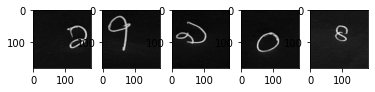

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(180, 180), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 180*180).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [3 8 9 0 4]


# **Changing The Hyperparameters for Third Try :**

In [ ]:
# Hyperparameters

batch_size = 30
num_iters = 4000
input_dim = 180 * 180
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Loading Bangla Digit Dataset
- **totaldata:** 51,202
- **minibatch:** 30
  - Number of examples in **1** iteration

- **iterations:** 4,000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 4000 \div \frac{51202}{30} = $2.34

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas
        

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0

print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180 * 180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180 * 180).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}. Epoch: {}'.format(iter, loss.item(), accuracy,epoch))
print("done training")

2
Iteration: 500. Loss: 1.434993863105774. Accuracy: 41.2224174965827. Epoch: 0
Iteration: 1000. Loss: 1.8437325954437256. Accuracy: 41.066198008201525. Epoch: 0
Iteration: 1500. Loss: 1.5072472095489502. Accuracy: 41.202890060535054. Epoch: 0
Iteration: 2000. Loss: 1.6020221710205078. Accuracy: 40.32415543839094. Epoch: 1
Iteration: 2500. Loss: 1.6084893941879272. Accuracy: 41.49580160124975. Epoch: 1
Iteration: 3000. Loss: 1.660828948020935. Accuracy: 41.10525288029682. Epoch: 1
done training


In [ ]:
save_model = True
root_path = '/content/drive/MyDrive/CSE_4_2_Folder/namta/'
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Bangla-digit-0001.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Bangla-digit-0001.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


# Testing Loaded Model With Digits:

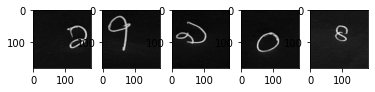

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(180, 180), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 180*180).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [3 5 5 0 5]


[1.9163694381713867, 2.871926784515381, 1.835204839706421, 2.114184617996216, 1.8218895196914673, 1.9516128301620483, 1.7685085535049438, 2.056140422821045, 1.7928978204727173, 2.147439479827881, 1.5592098236083984, 1.8707396984100342, 2.956183910369873]


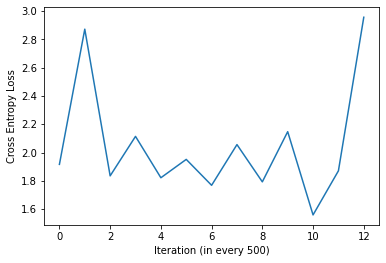

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# **Changing The Hyperparameters for Fourth Try :**

In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 7000
input_dim = 180 * 180
output_dim = 10

learning_rate = 0.000001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Loading Bangla Digit Dataset
- **totaldata:** 51,202
- **minibatch:** 20
  - Number of examples in **1** iteration

- **iterations:** 7,000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 7000 \div \frac{51202}{20} = $2.73

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0

print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 180 * 180).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 180 * 180).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}. Epoch: {}'.format(iter, loss.item(), accuracy,epoch))
print("done training")

3
Iteration: 500. Loss: 1.9163694381713867. Accuracy: 39.46494825229448. Epoch: 0
Iteration: 1000. Loss: 2.871926784515381. Accuracy: 39.36731107205624. Epoch: 0
Iteration: 1500. Loss: 1.835204839706421. Accuracy: 39.50400312438977. Epoch: 0
Iteration: 2000. Loss: 2.114184617996216. Accuracy: 39.386838508103885. Epoch: 0
Iteration: 2500. Loss: 1.8218895196914673. Accuracy: 39.386838508103885. Epoch: 1
Iteration: 3000. Loss: 1.9516128301620483. Accuracy: 39.32825619996095. Epoch: 1
Iteration: 3500. Loss: 1.7685085535049438. Accuracy: 39.50400312438977. Epoch: 1
Iteration: 4000. Loss: 2.056140422821045. Accuracy: 39.50400312438977. Epoch: 1
Iteration: 4500. Loss: 1.7928978204727173. Accuracy: 39.36731107205624. Epoch: 1
Iteration: 5000. Loss: 2.147439479827881. Accuracy: 39.46494825229448. Epoch: 2
Iteration: 5500. Loss: 1.5592098236083984. Accuracy: 39.523530560437415. Epoch: 2
Iteration: 6000. Loss: 1.8707396984100342. Accuracy: 39.32825619996095. Epoch: 2
Iteration: 6500. Loss: 2.9561

In [ ]:
save_model = True
root_path = '/content/drive/MyDrive/CSE_4_2_Folder/namta/'
if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Bangla-digit-000003.pkl')

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Bangla-digit-000003.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


# Testing Loaded Model with Digits

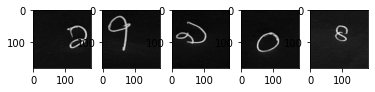

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(180, 180), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 180*180).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [3 8 9 0 4]


[1.9163694381713867, 2.871926784515381, 1.835204839706421, 2.114184617996216, 1.8218895196914673, 1.9516128301620483, 1.7685085535049438, 2.056140422821045, 1.7928978204727173, 2.147439479827881, 1.5592098236083984, 1.8707396984100342, 2.956183910369873]


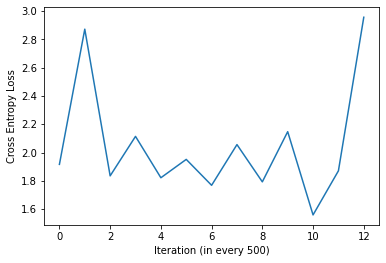

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Result Analysis:


**All results showing in the table:-**

|                | First Try     | Second Try    | Third Try | Fourth Try |
| :------------- | :----------: | -----------: |-----------: |-----------: |
|  Batch Size | 100  | 50    |30| 20|
| Num of Iters   | 3000 | 5000 |4000 | 7000|
|  Learning Rate | 0.001   | 0.00002    |0.0001| 0.000001|
|  Accuracy | 25%  | 41.26%  | 41.1% | 39.45%|
| Loss| 2.615 | 1.62 | 1.66| 2.95|







**Results:**

From the above Figure, we can say that, if we decrease the batch size and iterates more, we can get the accuracy more correctly.
Because, if we divide the dataset into some small parts, we will update it's weight and bisas in every iteration. For it, if we take small batch size, we can update it more. Doing this, it will able to learn  the training set more accurately. 

In here, minimizing the batch size and updating the number of iterations, increase it's accuracy more better. But if we want to get more accuracy and perform the the task well, we need to apply Relu and NN models where the accuracy will be above 95%. Using more algorithms, will increase it's performance.
